In [1]:
#importing packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed
buy-and-hold strategy return and risk: -4.3% and 29.17%
MACD strategy return and risk: 14.41% and 29.19%


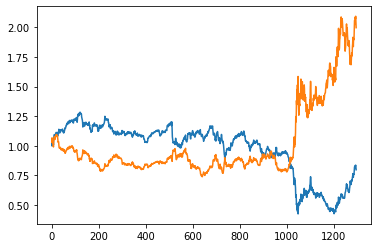

In [26]:
#downloading stock data
stock = 'XOM'
data = yf.download(stock, '2016-01-01', '2021-03-17')
#specifying strategy parameters
fee = 0.0005
short_ma = 5
long_ma = 12
#coding technical analysis singals
data['MA'+str(short_ma)] = data['Close'].rolling(short_ma).mean()
data['MA'+str(long_ma)] = data['Close'].rolling(long_ma).mean()
data['return'] = data['Close'].pct_change()
#simulating trading strategies
start = long_ma
data['signal'] = 2*(data['MA'+str(short_ma)]>data['MA'+str(long_ma)]) - 1
BnH_return = np.array(data['return'][start+1:])
MACD_return = np.array(data['return'][start+1:])*np.array(data['signal'][start:-1]) - fee*abs(np.array(data['signal'][start+1:]) - np.array(data['signal'][start:-1]))
BnH = np.prod(1+BnH_return)**(252/len(BnH_return)) - 1
MACD = np.prod(1+MACD_return)**(252/len(MACD_return)) - 1
BnH_risk = np.std(BnH_return)*(252)**(1/2)
MACD_risk = np.std(MACD_return)*(252)**(1/2)
#visualising the results
print('buy-and-hold strategy return and risk: '+str(round(BnH*100,2))+'% and '+str(round(BnH_risk*100,2))+'%')
print('MACD strategy return and risk: '+str(round(MACD*100,2))+'% and '+str(round(MACD_risk*100,2))+'%')
plt.plot(np.cumprod(1+BnH_return))
plt.plot(np.cumprod(1+MACD_return))